# Exercises 1 - MNIST Optical Character Recognition
### Course: Convolutional Neural Networks with Applications in Medical Image Analysis
Office hours: Mondays 13.15--15.00 (Tommy), Tuesdays 13.15--16.00 (Minh), Thursdays 08.15--12.00 (Attila)

Below is an example notebook for a simple Keras pipeline. The dataset is MNIST (http://yann.lecun.com/exdb/mnist/), where each image is of a handwritten digit of 0-9.

In [43]:
# Import needed packages

from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.python.client import device_lib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
# See if GPU is available to use

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2428220889947837717
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3737579565401141328
physical_device_desc: "device: XLA_CPU device"
]


In [103]:
# Load in MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Input image dimensions
img_rows, img_cols = np.shape(x_train)[1:] # This will keep original size. Change if you want to resize
batch_size = 128
num_classes = 10
epochs = 15

In [104]:
# Formatting stuff
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [105]:
# Split dataset into training and testing dataset
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.1, random_state=101)
print(x_train.shape[0], 'train samples')
print(x_validate.shape[0], 'validation samples')

54000 train samples
6000 validation samples


In [106]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [107]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [108]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [109]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_validate, y_validate))

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 - 31s - loss: 0.2565 - accuracy: 0.9217 - val_loss: 0.0650 - val_accuracy: 0.9793
Epoch 2/25
54000/54000 - 30s - loss: 0.0884 - accuracy: 0.9734 - val_loss: 0.0472 - val_accuracy: 0.9858
Epoch 3/25
54000/54000 - 30s - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0433 - val_accuracy: 0.9863
Epoch 4/25
54000/54000 - 30s - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 5/25
54000/54000 - 30s - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 6/25
54000/54000 - 31s - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0356 - val_accuracy: 0.9892
Epoch 7/25
54000/54000 - 30s - loss: 0.0345 - accuracy: 0.9891 - val_loss: 0.0357 - val_accuracy: 0.9897
Epoch 8/25
54000/54000 - 30s - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0391 - val_accuracy: 0.9893
Epoch 9/25
54000/54000 - 30s - loss: 0.0267 - accuracy: 0.9910 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 

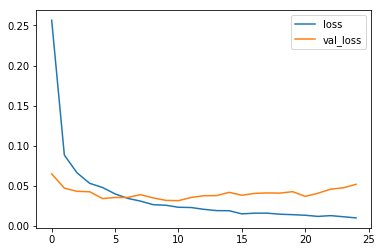

In [110]:
# Plotting the losses for the training and validation data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

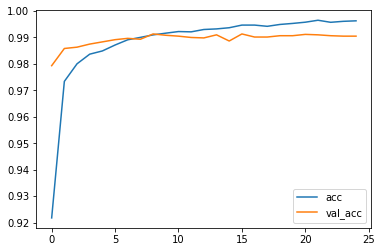

In [111]:
# Plotting the recognition accuracies for the training and validation data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.show()

In [112]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03167202679941137
Test accuracy: 0.9928


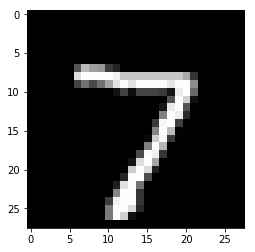

[3.3429248e-19 5.4651865e-12 1.8800995e-15 7.7857541e-15 1.5390637e-17
 1.1996141e-21 1.2754257e-27 1.0000000e+00 7.9994305e-19 1.2713538e-14]


The maximum is at: 7


In [113]:
# See what we actually did:
plt.imshow(x_test[0, :, :, 0], cmap='gray')
plt.show()

guesses = model.predict(x_test)

# Chance of image being of each character 0-9
print(guesses[0])

# Where is the maximum?
print('\n')
print('The maximum is at: ' + str(np.argmax(guesses[0])))

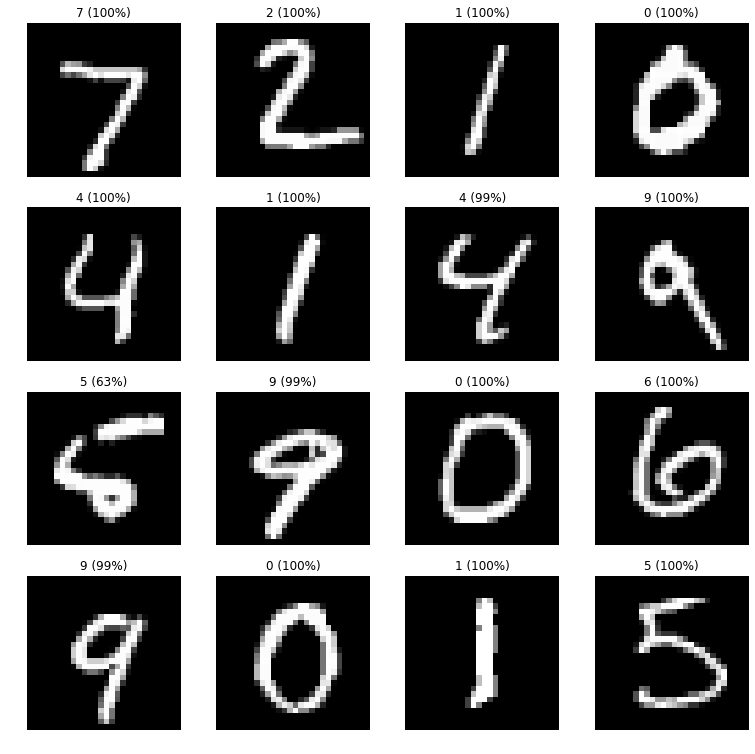

In [114]:
# Plotting some results

n = 4
plt.figure(figsize=(13, 13))
guesses = model.predict(x_test[0:n*n, :, :, :])
for i in range(n*n):
    plt.subplot(n, n, i+1)
    plt.imshow(x_test[i, :, :, 0], cmap='gray')
    plt.axis('off')
    plt.title(str(np.argmax(guesses[i])) + " (" + str(int(guesses[i, np.argmax(guesses[i])] * 100)) + "%)")